<div dir="auto" align="center">
    <h3>
        بسم الله الرحمن الرحیم
    </h3>
    <br>
    <h1>
        <strong>
            پردازش زبان‌های طبیعی
        </strong>
    </h1>
    <h2>
        <strong>
            تمرین چهارم (دسته‌بندی اخبار)
        </strong>
    </h2>
    <br>
    <h3>
        ارشان دلیلی - ٩٨١٠٥٧٥١
        <br><br>
        محمدمهدی ابوترابی - ۹۸۱۰۵۵۵۷
        <br><br>
        آرین احدی‌نیا - ٩٨١٠۳۸۷۸
    </h3>
    <br>
</div>
<hr>

<div>
    <h3 style='direction:rtl;text-align:justify;'>
        دسترسی به داده‌ها و مدل‌های ذخیره شده
    </h3>
</div>

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        به دلیل حجم بالای فایل‌های ذخیره شده، از قرار دادن آن‌ها در پوشه نوتبوک صرف نظر کرده و با اجرای قطعه کد زیر، از طریق گوگل درایو به آن‌ها دسترسی پیدا می‌کنیم.
    </p>
</div>

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
address = "NLP/"
sys.path.append(f"/content/drive/My Drive/{address}")
%cd /content/drive/My\ Drive/$address

Mounted at /content/drive
/content/drive/My Drive/NLP


<div>
    <h3 style='direction:rtl;text-align:justify;'>
        نصب و دسترسی به کتابخانه‌های مورد نیاز
    </h3>
</div>

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        با اجرای دو قطعه کد زیر، کتابخانه‌هایی که از آن‌ها در این تمرین استفاده شده است، نصب و قابل استفاده می‌شوند.
    </p>
</div>

In [ ]:
! pip install tqdm
! pip install pandas
! pip install requests
! pip install hazm
! pip install unidecode
! pip install datasets
! pip install fasttext
! pip install scikit-learn
! pip install nltk
! pip install torch
! pip install transformers
! pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [ ]:
import os
import re
import csv
import hazm
import nltk
import json
import torch
import pickle
import zipfile
import fasttext
import requests
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path
from datasets import Dataset
from string import punctuation
from IPython.display import display
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, TextClassificationPipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import BigBirdModel, AutoTokenizer

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets
from time import time


<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        بعد از ذخیره شدن داده‌ها در فایل فشرده dataset.zip، آن‌ها را از این فایل استخراج کرده و وارد برنامه می‌کنیم. با اجرای قطعه کد زیر، تعداد خبرهای هر دسته و تعداد کل خبرها را می‌توان مشاهده کرد.
    </p>
</div>

In [ ]:
dataset = pd.read_csv('./news_5000.csv',
                      names=['UN0', 'UN1', 'URL', 'Title', 'Category', 'UN3', 'UN4', 'UN5', 'UN6', 'UN7', 'UN8', 'UN9', 'Text', 'UN10', 'UN11', 'UN12', 'UN13', 'UN14', 'UN15', 'UN16', 'UN17', 'UN18'])

In [ ]:
dataset.head()

,UN0,UN1,URL,Title,Category,UN3,UN4,UN5,UN6,UN7,...,Text,UN10,UN11,UN12,UN13,UN14,UN15,UN16,UN17,UN18
0,4612103,MoL7VM5vRhfPHAszgyToRM,khabarfarsi.com/u/115997967,اجرای ویژه برنامه های گرامیداشت دهه فجر در کان...,فرهنگ و هنر,http://shabestan.ir/detail/News/1141850,شبستان,NaN,NaN,http://media.shabestan.ir/Original/1400/11/07/...,...,«نصیر قمصری»، در گفت وگو با خبرنگار خبرگزاری ش...,True,True,False,NaN,2022-01-29 06:38:04.225284+00:00,2022-01-29 06:45:04.225595+00:00,fa,NaN,False
1,3094439,Tp4kXv3A3oB7hRV8kb5oTn,khabarfarsi.com/u/108126652,والیبال نوجوانان جهان| ستاره ای که همچنان می د...,ورزشی,https://farsnews.ir/news/14000608000920/%D9%88...,خبرگزاری فارس,NaN,"امیرمحمد گل زاده,پشت خط زن تیم والیبال نوجوانا...",https://media.farsnews.ir/Uploaded/Files/Image...,...,به گزارش خبرنگار ورزشی خبرگزاری فارس، تیم والی...,True,True,False,NaN,2021-08-30 16:33:01.639304+00:00,2021-08-30 16:45:01.639629+00:00,fa,NaN,False
2,619358,ioxLEiYLABpttJPWbuhxJv,khabarfarsi.com/u/98835151,شرکت های دانش بنیان ضربات اقتصادی همه گیری کرو...,اقتصادی,https://farsnews.ir/news/13991113000098/%D8%B4...,خبرگزاری فارس,NaN,"کرونا,دانش,علم,دانش بنیان,شرکت های دانش بنیان,...",https://media.farsnews.ir/Uploaded/Files/Image...,...,از این رو، توجه به توسعه کسب وکارهای خرد و کوچ...,True,True,False,NaN,2021-02-02 07:44:59.532751+00:00,2021-02-02 07:47:59.533036+00:00,fa,NaN,False
3,4434763,S2ktAnodxNo5rFry9WBG3Z,khabarfarsi.com/u/115005815,بزرگترین مشکل سامسونگ S21 FE 5G چیست و چرا نبا...,فناوری و ارتباطات,https://www.shahrsakhtafzar.com/fa/news/smartp...,شهر سخت افزار,NaN,NaN,https://www.shahrsakhtafzar.com/fa/images/1400...,...,اگر به یاد داشته یا به قیمت های عنوان شده در ب...,True,True,False,NaN,2022-01-09 07:36:06.211189+00:00,2022-01-09 07:45:06.211481+00:00,fa,NaN,False
4,276713,bU8DQribGWLJtWvTrV5Sb8,khabarfarsi.com/u/97546025,فیلم | بازخوانی موضع رهبر معظم انقلاب درباره ج...,سیاسی,https://www.hawzahnews.com/news/937281/%D9%81%...,حوزه,NaN,NaN,https://media.hawzahnews.com/d/2020/11/28/4/10...,...,انتشارات انقلاب اسلامی با همکاری صدای جمهوری ا...,True,True,False,NaN,2021-01-04 13:08:04.787975+00:00,2021-01-04 13:41:04.788242+00:00,fa,NaN,False


In [ ]:
data = dataset.loc[:, ['Title', 'Category', 'Text', 'URL']]
data = data.dropna(axis='index', how='any')
data = data.to_dict('records')

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
    با اجرای قطعه کد زیر، تعداد خبرهای هر دسته و تعداد کل خبرها را می‌توان مشاهده کرد.
    </p>
</div>

In [ ]:
CATEGORIES = pd.unique(dataset['Category'])
CLASSES_CATEGORIES = {k:v for k, v in zip(np.arange(len(CATEGORIES)), CATEGORIES)}

CATEGORIES_CLASSES = {v: k for k, v in CLASSES_CATEGORIES.items()}

length_dict = {key: 0 for key in CATEGORIES}
for record in data:
    length_dict[record['Category']] += 1

df_dict = {
    'دسته': CATEGORIES,
    'تعداد': length_dict.values(),
}

df = pd.DataFrame(df_dict)
df.index += 1
df.loc[0] = ['کل خبرها', len(data)]
df = df.sort_index()
display(df)

,دسته,تعداد
0,کل خبرها,4678
1,فرهنگ و هنر,416
2,ورزشی,749
3,اقتصادی,515
4,فناوری و ارتباطات,301
5,سیاسی,477
6,علمی و پزشکی,428
7,بین الملل,678
8,مذهبی,389
9,حوادث,306


<div>
    <h3 style='direction:rtl;text-align:justify;'>
        ٢. پیش پردازش اولیه‌ی متن
    </h3>
</div>

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        ابزار مورد استفاده برای پیش‌پردازش متن ورودی به صورت ماژولار طراحی شده است؛ به طوری که با صدا زدن تابع preprocess از آن، متن داده شده با عبور از یک خط لوله به صورت مرحله به مرحله تغییر می‌کند تا به یک ساختار استاندارد برسد. این مراحل عبارتند از:
    </p>
</div>

<div dir="auto" align="justify">
    <li style='direction:rtl;text-align:justify;'>
        نرمال سازی داده‌ها (normalize)
    </li>
    <li style='direction:rtl;text-align:justify;'>
        حذف لینک‌ها (remove_links)
    </li>
    <li style='direction:rtl;text-align:justify;'>
        حذف نشانه‌های نگارشی (remove_punctuations)
    </li>
    <li style='direction:rtl;text-align:justify;'>
        واحد سازی داده‌ها (word_tokenize)
    </li>
    <li style='direction:rtl;text-align:justify;'>
        حذف کلمات نامعتبر (remove_invalid_words)
    </li>
    <li style='direction:rtl;text-align:justify;'>
        حذف ایست‌واژه‌ها (remove_stopwords)
    </li>
</div>

In [ ]:
class Preprocessor:

    def __init__(self, stopwords_path):
        self.stopwords = []
        with open(stopwords_path, encoding='utf-8') as file:
            self.stopwords = file.read().split()

    def preprocess(self, text):
        text = self.normalize(text)
        text = self.remove_links(text)
        text = self.remove_punctuations(text)
        words = self.word_tokenize(text)
        words = self.remove_invalid_words(words)
        words = self.remove_stopwords(words)
        return words

    def normalize(self, text):
        return hazm.Normalizer().normalize(text)

    def remove_links(self, text):
        patterns = ['\S*http\S*', '\S*www\S*', '\S+\.ir\S*', '\S+\.com\S*', '\S+\.org\S*', '\S*@\S*']
        for pattern in patterns:
            text = re.sub(pattern, ' ', text)
        return text

    def remove_punctuations(self, text):
        return re.sub(f'[{punctuation}؟،٪×÷»«]+', '', text)

    def word_tokenize(self, text):
        return hazm.word_tokenize(text)

    def remove_invalid_words(self, words):
        return [word for word in words if len(word) > 3 or re.match('^[\u0600-\u06FF]{2,3}$', word)]

    def remove_stopwords(self, words):
        return [word for word in words if word not in self.stopwords]

In [ ]:
def get_preprocessed_texts(data, preprocessor):
    preprocessed_title = []
    preprocessed_texts = []
    preprocessed_total = []
    titles = [doc['Title'] for doc in data]
    preprocessed_title = [preprocessor.preprocess(title) for title in titles]
    texts = [doc['Text'] for doc in data]
    preprocessed_texts = [preprocessor.preprocess(text) for text in tqdm(texts)]
    preprocessed_total = [preprocessor.preprocess(' '.join([doc['Title'], doc['Text']])) for doc in tqdm(data)]
    return preprocessed_title, preprocessed_texts, preprocessed_total

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        با اجرای قطعه کد زیر، یک instance از ماژول Preprocessor ایجاد کرده و شروع به پیش پردازش داده‌ها می‌کنیم، یا داده‌های پیش‌پردازش‌شده‌ی ذخیره‌شده را از فایل مربوطه بازیابی می‌کنیم.
    </p>
</div>

In [ ]:
preprocessor = Preprocessor(stopwords_path='./stopwords.txt')

In [ ]:
preprocessed_title, preprocessed_texts, preprocessed_total = get_preprocessed_texts(data, preprocessor)

100%|██████████| 4678/4678 [00:10<00:00, 454.93it/s]


<div>
    <h3 style='direction:rtl;text-align:justify;'>
        ٣. دسته‌بندی اخبار بر اساس برچسب خبر
    </h3>
</div>

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        در این مرحله با استفاده از دو مدل متفاوت زبانی، یکی مبتنی بر روش سنتی رگرسیون لجستیک و دیگری بر پایه ترنسفرمر، شروع به یادگیری بر روی خبرهای استخراج شده می‌کنیم و در انتها، نتیجه اجرای ده کوئری را بر روی هر یک مشاهده می‌کنیم. در نهایت، ارزیابی‌های مورد بحث در داک تمرین را بر روی داده‌های تست انجام می‌دهیم.
    </p>
</div>

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        کوئری‌های مورد استفاده در این بخش در زیر آمده‌اند.
    </p>
</div>

In [ ]:
QUERIES = [
    "نتیجه توافق برجام",
    "حمله ارتش روسیه به اوکراین",
    "افزایش نرخ تورم در کشور",
    "آمار فوتی‌های کرونا",
    "اقدامات شهرداری تهران",
    "صعود ایران به جام جهانی",
    "بیماری آبله میمونی",
    "جشنواره فیلم فجر",
    "رونمایی از گوشی جدید اپل",
    "روش پخت غذا",
]

In [ ]:
labels = [CATEGORIES_CLASSES[d['Category']] for d in data]

In [ ]:
CATEGORIES_CLASSES.keys()

dict_keys(['فرهنگ و هنر', 'ورزشی', 'اقتصادی', 'فناوری و ارتباطات', 'سیاسی', 'علمی و پزشکی', 'بین الملل', 'مذهبی', 'حوادث', 'اجتماعی'])

In [ ]:
CLASSES_CATEGORIES.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<div>
    <h4 style='direction:rtl;text-align:justify;'>
        ١. مدل مبتنی بر روش Logistic Regression
    </h4>
</div>

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        در این بخش از کلاس TfidfVectorizer از کتاب‌خانه‌ی sklearn استفاده کرده و مجموعه کلمات یکتای موجود در عناوین خبرها را به عنوان ورودی به آن می‌دهیم. این کلمات یکتا را از روی فایل ذخیره شده‌ی vocabulary.pickle می‌خوانیم. در ادامه، یک مدل ایجاد کرده و بردار embedding عنوان هر خبر را به روش tf-idf به دست می‌آوریم. سپس، داده‌هایمان را به دو مجموعه train و test افراز می‌کنیم. حال، با استفاده از کلاس LogisticRegression کتاب‌خانه‌ی sklearn شروع به یادگیری داده‌های train می‌کنیم.
    </p>
</div>

In [ ]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        self.vectorizer.fit(list(map(lambda doc: ' '.join(doc), data)))
    
    def transform_vectorizer(self, preprocessed_title, preprocessed_texts):
        embeddings = []
        for title, text in zip(preprocessed_title, preprocessed_texts):
          emb_title = self.vectorizer.transform([' '.join(title)]).toarray()[0]
          emb_text = self.vectorizer.transform([' '.join(text)]).toarray()[0]
          embeddings.append(((emb_text * 19) + emb_title) / 20)
        return embeddings

    def save_TF_IDF_model(self, path="TF_IDF_model.pickle"):
        with open(path, "wb") as file:
            pickle.dump(self.vectors.todense().tolist(), file)

    def load_TF_IDF_model(self, path="TF_IDF_model.pickle"):
        with open(path, "rb") as file:
            return pickle.load(file)

In [ ]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(preprocessed_total)

In [ ]:
embeddings = TF_IDF_model.transform_vectorizer(preprocessed_title, preprocessed_texts)

In [ ]:
train_vectors, test_vectors, train_labels, test_labels = train_test_split(embeddings, labels, test_size=0.15, shuffle=True, random_state=11)

In [ ]:
import joblib
classifier = joblib.load('logistic_regression.joblib')

# classifier = LogisticRegression(max_iter=1000, random_state=0)
# classifier.fit(train_vectors, train_labels)

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        در این قسمت، دسته‌ی هر یک از کوئری‌های مشخص شده را با استفاده از مدل یادگیری پیش‌بینی می‌کنیم.
    </p>
</div>

In [ ]:
def predict_logistic(x):
    preprocessed_query = ' '.join(preprocessor.preprocess(x))
    query_embed = TF_IDF_model.vectorizer.transform([preprocessed_query])
    predicted_class_code = classifier.predict(query_embed)[0]
    return CLASSES_CATEGORIES[predicted_class_code]

In [ ]:
predict_logistic('بایرن مونیخ قهرمان لیگ قهرمانان اروپا شد.')

'ورزشی'

In [ ]:
queries_class_prediction = []

for query in QUERIES:
    preprocessed_query = ' '.join(preprocessor.preprocess(query))
    query_embed = TF_IDF_model.vectorizer.transform([preprocessed_query])
    predicted_class_code = classifier.predict(query_embed)[0]
    probability = classifier.predict_proba(query_embed)[0][predicted_class_code]
    queries_class_prediction.append({
        'Query': query,
        'Predicted Category': CLASSES_CATEGORIES[predicted_class_code],
        'Probability': probability
    })

display(pd.DataFrame(queries_class_prediction))

,Query,Predicted Category,Probability
0,نتیجه توافق برجام,بین الملل,0.359573
1,حمله ارتش روسیه به اوکراین,بین الملل,0.923956
2,افزایش نرخ تورم در کشور,اقتصادی,0.567293
3,آمار فوتی‌های کرونا,اجتماعی,0.289385
4,اقدامات شهرداری تهران,ورزشی,0.158217
5,صعود ایران به جام جهانی,ورزشی,0.477349
6,بیماری آبله میمونی,علمی و پزشکی,0.324221
7,جشنواره فیلم فجر,فرهنگ و هنر,0.978701
8,رونمایی از گوشی جدید اپل,فناوری و ارتباطات,0.733749
9,روش پخت غذا,علمی و پزشکی,0.340093


<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        در این قسمت، بررسی می‌کنیم که مدل یادگیری‌مان بر روی داده‌های test چه عملکردی دارد. با اجرای قطعه کد زیر، معیار ارزیابی F1-Macro و نیز accuracy و ماتریس درهم‌ریختگی محاسبه شده و نمایش داده می‌شوند. (در این ماتریس، ستون‌ها ground truth و سطرها پیش‌بینی ما هستند.)
    </p>
</div>

In [ ]:
mean_acc = classifier.score(test_vectors, test_labels)
print(f"Accurracy: {round(mean_acc, 3)}\n")

predicted_labels = classifier.predict(test_vectors)
f1_macro = f1_score(test_labels, predicted_labels, labels=np.arange(10), average='macro')
print(f"F1-Macro: {round(f1_macro, 3)}\n")

confusion_mat = confusion_matrix(test_labels, predicted_labels, labels=np.arange(10))
confusion_mat_df = pd.DataFrame(confusion_mat).rename(columns=CLASSES_CATEGORIES, index=CLASSES_CATEGORIES)
display(confusion_mat_df)

Accurracy: 0.789

F1-Macro: 0.776



,فرهنگ و هنر,ورزشی,اقتصادی,فناوری و ارتباطات,سیاسی,علمی و پزشکی,بین الملل,مذهبی,حوادث,اجتماعی
فرهنگ و هنر,53,3,1,1,3,3,2,3,0,3
ورزشی,2,109,0,0,0,0,0,0,0,3
اقتصادی,3,0,61,1,6,2,6,0,0,2
فناوری و ارتباطات,1,1,2,24,0,1,1,0,0,2
سیاسی,1,0,4,1,52,1,15,8,1,2
علمی و پزشکی,1,1,1,1,0,53,2,0,0,6
بین الملل,0,1,1,0,1,1,91,0,0,0
مذهبی,4,0,2,0,6,4,1,45,0,4
حوادث,0,0,1,0,0,0,4,1,39,1
اجتماعی,2,0,6,0,5,4,2,0,0,27


In [ ]:
classifier = LogisticRegression(max_iter=1000, random_state=0)
scoring = ['accuracy', 'precision_macro', 'recall_macro','precision_micro', 'recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(classifier, embeddings, labels, scoring=scoring)

in this section we calculate f1_score accuracy precision and recall based on macro and micro, and report them with std by using cross validation

In [ ]:
for item in scoring:
  print(f"%0.3f {item} with a standard deviation of %0.3f" % (scores[f'test_{item}'].mean(), scores[f'test_{item}'].std()))

0.788 accuracy with a standard deviation of 0.008
0.788 precision_macro with a standard deviation of 0.007
0.765 recall_macro with a standard deviation of 0.010
0.788 precision_micro with a standard deviation of 0.008
0.788 recall_micro with a standard deviation of 0.008
0.788 f1_micro with a standard deviation of 0.008
0.772 f1_macro with a standard deviation of 0.009


In [ ]:
import joblib
joblib.dump(classifier, 'logistic_regression.joblib')

['logistic_regression.joblib']

<div>
    <h4 style='direction:rtl;text-align:justify;'>
        ٢. مدل مبتنی بر پایه Transformer
    </h4>
</div>

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        در این بخش، با استفاده از کلاس AutoModelForSequenceClassification از کتاب‌خانه‌ی transformers نوشته‌های موجود را به دسته‌ی متناظرشان مرتبط می‌کنیم. برای این کار، از مدل BigBird که از پیش تمرین داده شده است به عنوان زیربنا استفاده می‌کنیم و سپس با افراز داده‌های موجود به سه بخش train و validation و test، با استفاده از دو بخش train و validation آن را بیش‌تر در راستای هدفمان که تشخیص دسته‌ی خبرهاست تمرین می‌دهیم.
        همچنین در طول تمرین دادن از یک AutoTokenizer مبتنی بر ParsBERT استفاده می‌کنیم.
    </p>
    <p style='direction:rtl;text-align:justify;'>
        برای تمرین دادن این مدل از کلاس Trainer از همان کتاب‌خانه‌ی transformers استفاده می‌کنیم و پارامترهای تمرین دادن را هم مطابق آنچه در ادامه مشهود است با استفاده از متغیر training_args به آن می‌دهیم. در نهایت پس از پایان فرایند تمرین دادن، مدل را ذخیره می‌کنیم تا در دفعات بعد بتوانیم به صورت مستقیم آن را از فایل بازیابی کنیم و از آن استفاده کنیم.
</div>

In [ ]:
torch.cuda.ipc_collect()

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:

MODEL_NAME = "SajjadAyoubi/distil-bigbird-fa-zwnj"
model = BigBirdModel.from_pretrained(MODEL_NAME, block_size=32)
model = BigBirdModel.from_pretrained(MODEL_NAME, attention_type="original_full")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at SajjadAyoubi/distil-bigbird-fa-zwnj were not used when initializing BigBirdModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BigBirdModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BigBirdModel were not initialized from the model checkpoint at SajjadAyoubi/distil-bigbird-fa-zwnj and are newly initialized: ['bert.pooler.

In [ ]:
dataset = dataset.loc[:, ['Title', 'Category', 'Text', 'URL']]
dataset = dataset.dropna(axis='index', how='any')

dataset['category_code'] = dataset['Category'].apply(lambda x: CATEGORIES_CLASSES[x])
labels = dataset['category_code'].to_numpy()
X_text = [' '.join(x) for x in preprocessed_total]

X_train, X_test, y_train, y_test = train_test_split(X_text, labels, test_size=0.2, random_state=1)

In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [ ]:
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = NewsDataset(train_encodings, y_train)
test_dataset = NewsDataset(test_encodings, y_test)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cl_model = AutoModelForSequenceClassification.from_pretrained('transformer_model').to(device)
MODEL_NAME = "SajjadAyoubi/distil-bigbird-fa-zwnj"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# cl_model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=10).to(device)

Some weights of the model checkpoint at SajjadAyoubi/distil-bigbird-fa-zwnj were not used when initializing BigBirdForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint 

In [ ]:

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,            # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)


trainer = Trainer(
    model=cl_model,                      # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
)

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3742
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1170
  Number of trainable parameters = 79120906
Attention type 'block_sparse' is not possible if sequence_length: 338 <= num global tokens: 2 * config.block_size + min. num sliding tokens: 3 * config.block_size + config.num_random_blocks * config.block_size + additional buffer: config.num_random_blocks * config.block_size = 352 with config.block_size = 32, config.num_random_blocks = 3. Changing attention type to 'original_full'...


Step,Training Loss
10,2.326200
20,2.292800
30,2.293700
40,2.261300
50,2.222100
60,2.159800
70,2.131600
80,2.053600
90,1.861300
100,1.839700


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1170, training_loss=0.5769668171548435, metrics={'train_runtime': 670.3803, 'train_samples_per_second': 27.91, 'train_steps_per_second': 1.745, 'total_flos': 1658816961930960.0, 'train_loss': 0.5769668171548435, 'epoch': 5.0})

<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        در این قسمت، دسته‌ی هر یک از کوئری‌های مشخص شده را با استفاده از مدل یادگیری پیش‌بینی می‌کنیم.
    </p>
</div>

In [ ]:
cl_model

BigBirdModel(
  (embeddings): BigBirdEmbeddings(
    (word_embeddings): Embedding(42000, 768, padding_idx=0)
    (position_embeddings): Embedding(4096, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BigBirdEncoder(
    (layer): ModuleList(
      (0): BigBirdLayer(
        (attention): BigBirdAttention(
          (self): BigBirdSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BigBirdSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inp

In [ ]:
def predict(x):
  preprocessed_query = ' '.join(preprocessor.preprocess(x))
  _input = tokenizer(preprocessed_query, truncation=True, padding=True, return_tensors='pt').to(device)
  output = cl_model(**_input)
  predicted_label = output[0].softmax(1).argmax().item()
  predicted_class_code = CLASSES_CATEGORIES[predicted_label]
  return predicted_class_code

In [ ]:
predict('بایرن مونیخ قهرمان لیگ قهرمانان اروپا شد.')

Attention type 'block_sparse' is not possible if sequence_length: 8 <= num global tokens: 2 * config.block_size + min. num sliding tokens: 3 * config.block_size + config.num_random_blocks * config.block_size + additional buffer: config.num_random_blocks * config.block_size = 352 with config.block_size = 32, config.num_random_blocks = 3. Changing attention type to 'original_full'...


'ورزشی'

In [ ]:
queries_class_prediction = []

for query in QUERIES:
    predicted_class_code = predict(query)
    queries_class_prediction.append({
        'Query': query,
        'Predicted Category': predicted_class_code,
    })

display(pd.DataFrame(queries_class_prediction))

,Query,Predicted Category
0,نتیجه توافق برجام,بین الملل
1,حمله ارتش روسیه به اوکراین,بین الملل
2,افزایش نرخ تورم در کشور,اقتصادی
3,آمار فوتی‌های کرونا,اجتماعی
4,اقدامات شهرداری تهران,سیاسی
5,صعود ایران به جام جهانی,ورزشی
6,بیماری آبله میمونی,علمی و پزشکی
7,جشنواره فیلم فجر,فرهنگ و هنر
8,رونمایی از گوشی جدید اپل,فناوری و ارتباطات
9,روش پخت غذا,علمی و پزشکی


<div dir="auto" align="justify">
    <p style='direction:rtl;text-align:justify;'>
        در این قسمت، بررسی می‌کنیم که مدل یادگیری‌مان بر روی داده‌های test چه عملکردی دارد. با اجرای قطعه کد زیر، معیار ارزیابی F1-Macro و نیز accuracy و ماتریس درهم‌ریختگی محاسبه شده و نمایش داده می‌شوند. (در این ماتریس، ستون‌ها ground truth و سطرها پیش‌بینی ما هستند.)
    </p>
    <p style='direction:rtl;text-align:justify;'>
         مشاهده می‌کنیم که دسته‌هایی که مدل برای درخواست‌هایمان در بخش قبلی پیشنهاد داده همگی منطقی هستند و معیارهای F1-Macro و دقت میانگین و ماتریس درهم‌ریختگی نیز نشان‌دهنده‌ی کارکرد خوب این مدل هستند.
    </p>
</div>

In [ ]:
y_pred_transformers = []
for x in tqdm(X_test):
    _input = tokenizer(x, truncation=True, padding=True, return_tensors='pt').to(device)
    output = cl_model(**_input)
    y_pred_transformers.append(output[0].softmax(1).argmax().item())

100%|██████████| 936/936 [03:30<00:00,  4.45it/s]


In [ ]:
print(f"Accurracy: {round(accuracy_score(y_test, y_pred_transformers), 3)}\n")

f1_macro = f1_score(y_test, y_pred_transformers, average='macro')
print(f"F1-Macro: {round(f1_macro, 3)}\n")

f1_micro = f1_score(y_test, y_pred_transformers, average='micro')
print(f"F1-Micro: {round(f1_micro, 3)}\n")


confusion_mat = confusion_matrix(y_test, y_pred_transformers, labels=np.arange(10))
confusion_mat_df = pd.DataFrame(confusion_mat).rename(columns=CLASSES_CATEGORIES, index=CLASSES_CATEGORIES)
display(confusion_mat_df)

Accurracy: 0.793

F1-Macro: 0.779

F1-Micro: 0.793



,فرهنگ و هنر,ورزشی,اقتصادی,فناوری و ارتباطات,سیاسی,علمی و پزشکی,بین الملل,مذهبی,حوادث,اجتماعی
فرهنگ و هنر,62,2,1,1,0,5,2,8,1,1
ورزشی,1,142,0,1,0,1,0,2,0,4
اقتصادی,1,0,80,2,5,2,6,0,0,15
فناوری و ارتباطات,1,0,3,45,1,7,1,2,2,3
سیاسی,2,0,4,2,63,0,9,11,0,6
علمی و پزشکی,1,0,3,1,0,69,0,0,0,7
بین الملل,1,0,6,1,7,2,119,0,3,0
مذهبی,5,1,0,0,4,1,0,64,0,7
حوادث,1,0,1,1,0,1,2,0,48,3
اجتماعی,4,1,7,2,2,1,1,2,0,50


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_transformers, average='macro')
print("Macro-average precision: {:.2f}".format(precision))
print("Macro-average recall: {:.2f}".format(recall))
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_transformers, average='micro')
print("Micro-average precision: {:.2f}".format(precision))
print("Micro-average recall: {:.2f}".format(recall))

Macro-average precision: 0.79
Macro-average recall: 0.78
Micro-average precision: 0.79
Micro-average recall: 0.79


In [ ]:
cl_model.save_pretrained('transformer_model')

Configuration saved in transformer_model/config.json
Model weights saved in transformer_model/pytorch_model.bin


In [ ]:
!zip -r /content/sample_data.zip /content/transformer_model
from google.colab import files
files.download('/content/sample_data.zip')

# 3- NN with fasttext

In this sectin we will use fasttext to classify our news. Fasttext is a library for learning of word embeddings and text classification. It is a library for efficient learning of word representations and sentence classification. It works on standard, generic hardware. Models can later be reduced in size to even fit on mobile devices. we will transform input tokens into fast text word embeddings and then get weighted average of these embeddings based on tdf-idf of them to get a vector representation of our input. Then we will use a simple neural network to classify our news.

In [ ]:
import fasttext

class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        with open('FastText_train.txt', 'w', encoding='utf-8') as file:
            file.write('\n'.join(list(map(lambda doc: ' '.join(doc), texts))))
        self.model = fasttext.train_unsupervised('FastText_train.txt', self.method, minn=2, maxn=6, wordNgrams=10,)
        os.remove('FastText_train.txt')

    def get_query_embedding(self, query, tf_idf_vectorizer):
        if self.preprocessor:
            query = self.preprocessor.preprocess(query)
        if type(query) == str:
            query = query.split()
        tf_idf_embed = tf_idf_vectorizer.transform([' '.join(query)]).toarray()[0]
        weights = []
        vocab_weights_list = [tf_idf_embed[tf_idf_vectorizer.vocabulary_[word]] for word in query if word in tf_idf_vectorizer.vocabulary_]
        min_weight = min(vocab_weights_list) if len(vocab_weights_list) > 0 else 1
        for word in query:
          if word in tf_idf_vectorizer.vocabulary_:
            weight = tf_idf_embed[tf_idf_vectorizer.vocabulary_[word]]
          else:
            weight = min_weight
          weights.append(weight)  
        weights = np.array(weights)
        query_embed = np.mean([self.model.get_word_vector(query[i])* weights[i] for i in range(len(query))], axis=0)
        return query_embed

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [ ]:
FastText_model = FastText(preprocessor=preprocessor)
FastText_model.prepare(preprocessed_total, mode='load', save=False)

In [ ]:
text = 'کرونا'

FastText_model.model.get_nearest_neighbors(text)

[(0.9410250782966614, 'کرونای'),
 (0.916727602481842, 'کرونایی'),
 (0.898478090763092, 'کروناویروس'),
 (0.8946961164474487, 'کرون'),
 (0.8778902292251587, 'شیوع'),
 (0.8608316779136658, 'ابتلا'),
 (0.8591848611831665, 'مبتلا'),
 (0.8578081727027893, 'امیکرون'),
 (0.8418070673942566, 'واکسیناسیون'),
 (0.8371744751930237, 'اومیکرون')]

In [ ]:
text =  "اقدامات شهرداری تهران"
TF_IDF_model.vectorizer.transform([' '.join(text)])

<1x24767 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [ ]:
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([ 0.19476603, -0.05470406,  0.26639822, -0.11887681,  0.00698298,
        0.08140592,  0.03982836, -0.12047374, -0.01527921,  0.17961872,
        0.07180371, -0.1990444 ,  0.04150448, -0.13858917,  0.28285876,
       -0.02802586, -0.06896676,  0.28099856, -0.01300358, -0.02638977,
        0.22719795,  0.0039195 , -0.13312572, -0.02441638,  0.03303911,
        0.12361485, -0.04417124,  0.14267294,  0.04583634, -0.15697455,
       -0.00375187, -0.06187701, -0.0521847 , -0.1545234 ,  0.18178572,
       -0.2687355 ,  0.19002302,  0.12841092,  0.01574793,  0.03527972,
       -0.01417547,  0.00664668,  0.07076176, -0.06302169, -0.09014467,
       -0.04865832,  0.15475081,  0.10616121, -0.09342459, -0.19020575,
        0.16507177,  0.1298375 ,  0.34082544,  0.06601405,  0.12385812,
       -0.06427272, -0.10237358, -0.07235847, -0.15280043, -0.12795481,
       -0.15126085, -0.13417037,  0.03775533, -0.01011365, -0.01213493,
       -0.07887498,  0.0649427 , -0.17023367, -0.30656424, -0.11

In this section you can see out nueral network

In [ ]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=10):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features, 50),
            nn.BatchNorm1d(50),
            nn.ReLU(),
            nn.Linear(50, 30),
            nn.BatchNorm1d(30),
            nn.ReLU(),
            nn.Dropout(p=0.15),
            nn.Linear(30, 15),
            nn.BatchNorm1d(15),
            nn.Tanh(), 
            nn.Dropout(p=0.05),
            nn.Linear(15, num_classes),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        return self.seq(x)

In [ ]:
embeddings = [FastText_model.get_query_embedding(' '.join(text), TF_IDF_model.vectorizer) for text in tqdm(preprocessed_total)]

100%|██████████| 4678/4678 [00:21<00:00, 216.40it/s]


In [ ]:
class NewsDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.y = labels
        self.embeddings = embeddings
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self, i):
        return self.embeddings[i], self.y[i]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


train_loader = DataLoader(dataset= NewsDataSet(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(dataset= NewsDataSet(X_val, y_val), batch_size=64, shuffle=False)
test_loader = DataLoader(dataset= NewsDataSet(X_test, y_test), batch_size=64, shuffle=False)

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = ClassifierModel().to(device)

In [ ]:
# Load
PATH = "nn_fasttext_model.pt"
model = torch.load(PATH)
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    epoch_true = 0
    epoch_all = 0
    eval_loss = 0
    i = 0
    predicted_labels = []
    true_labels = []

    

    with torch.no_grad(), tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
        for i, (x, label) in pbar:
            x = x.to(device)
            label = label.to(device)
            predicted = model(x)

            loss = criterion(predicted, label)

            eval_loss += loss.item()

            predictions = predicted.argmax(-1)
            epoch_all += len(predictions)
            epoch_true += (predictions == label).sum()
            true_labels.extend(label)
            predicted_labels.extend(predictions)
            discription = 'Validation' if not test_mode else 'Test'
            pbar.set_description(f'{discription} Acc: {epoch_true * 100. / epoch_all:.2f}%')

    predicted_labels = [_.item() for _ in predicted_labels]
    true_labels = [_.item() for _ in true_labels]
    f1_score_macro = f1_score(true_labels, predicted_labels, average='macro')
    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [ ]:
num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores = []
for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0
    i = 0

    model.train()
    
    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, label) in pbar:
            x = x.to(device)
            label = label.to(device)
            predicted = model(x)

            loss = criterion(predicted, label)
            
            train_loss += loss.item()

            predictions = predicted.argmax(-1)
            
            epoch_all += len(predictions)
            epoch_true += (predictions == label).sum()

            pbar.set_description(f'Training Acc: {epoch_true * 100. / epoch_all:.2f}%')
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()  
  
    model.eval()
    
    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores.append(f1_score_macro)
    
    end_time = time()
    
    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")

Validation Acc: 46.15%: 100%|██████████| 8/8 [00:00<00:00, 231.86it/s]


Epoch 1 finished in 1.51s
[Epoch 1]	Train Loss: 0.0677	Validation Loss: 0.0336	 F1 score macro: 0.3492277985524248


Validation Acc: 54.70%: 100%|██████████| 8/8 [00:00<00:00, 28.41it/s]


Epoch 2 finished in 4.00s
[Epoch 2]	Train Loss: 0.0596	Validation Loss: 0.0308	 F1 score macro: 0.43536904555194117


Validation Acc: 58.55%: 100%|██████████| 8/8 [00:00<00:00, 164.46it/s]


Epoch 3 finished in 1.91s
[Epoch 3]	Train Loss: 0.0553	Validation Loss: 0.0287	 F1 score macro: 0.48017337868483895


Validation Acc: 60.47%: 100%|██████████| 8/8 [00:00<00:00, 205.17it/s]


Epoch 4 finished in 1.08s
[Epoch 4]	Train Loss: 0.0521	Validation Loss: 0.0273	 F1 score macro: 0.5104525566260416


Validation Acc: 61.97%: 100%|██████████| 8/8 [00:00<00:00, 222.71it/s]


Epoch 5 finished in 1.09s
[Epoch 5]	Train Loss: 0.0497	Validation Loss: 0.0261	 F1 score macro: 0.5422911208209873


Validation Acc: 63.25%: 100%|██████████| 8/8 [00:00<00:00, 204.85it/s]


Epoch 6 finished in 1.19s
[Epoch 6]	Train Loss: 0.0476	Validation Loss: 0.0251	 F1 score macro: 0.5563464101540608


Validation Acc: 64.53%: 100%|██████████| 8/8 [00:00<00:00, 143.53it/s]


Epoch 7 finished in 1.07s
[Epoch 7]	Train Loss: 0.0460	Validation Loss: 0.0244	 F1 score macro: 0.5751841153094809


Validation Acc: 65.38%: 100%|██████████| 8/8 [00:00<00:00, 214.30it/s]


Epoch 8 finished in 1.11s
[Epoch 8]	Train Loss: 0.0444	Validation Loss: 0.0237	 F1 score macro: 0.5915050939590445


Validation Acc: 64.74%: 100%|██████████| 8/8 [00:00<00:00, 192.40it/s]


Epoch 9 finished in 1.22s
[Epoch 9]	Train Loss: 0.0430	Validation Loss: 0.0230	 F1 score macro: 0.5840846358614478


Validation Acc: 65.81%: 100%|██████████| 8/8 [00:00<00:00, 174.74it/s]


Epoch 10 finished in 1.21s
[Epoch 10]	Train Loss: 0.0418	Validation Loss: 0.0224	 F1 score macro: 0.60614466543104


Validation Acc: 67.95%: 100%|██████████| 8/8 [00:00<00:00, 173.78it/s]


Epoch 11 finished in 1.20s
[Epoch 11]	Train Loss: 0.0406	Validation Loss: 0.0219	 F1 score macro: 0.6331548994559689


Validation Acc: 67.31%: 100%|██████████| 8/8 [00:00<00:00, 170.93it/s]


Epoch 12 finished in 1.42s
[Epoch 12]	Train Loss: 0.0396	Validation Loss: 0.0213	 F1 score macro: 0.622948008948396


Validation Acc: 68.80%: 100%|██████████| 8/8 [00:00<00:00, 220.13it/s]


Epoch 13 finished in 1.12s
[Epoch 13]	Train Loss: 0.0385	Validation Loss: 0.0208	 F1 score macro: 0.64595250793867


Validation Acc: 70.30%: 100%|██████████| 8/8 [00:00<00:00, 197.86it/s]


Epoch 14 finished in 0.95s
[Epoch 14]	Train Loss: 0.0379	Validation Loss: 0.0204	 F1 score macro: 0.6658965410597872


Validation Acc: 70.30%: 100%|██████████| 8/8 [00:00<00:00, 172.82it/s]


Epoch 15 finished in 0.91s
[Epoch 15]	Train Loss: 0.0368	Validation Loss: 0.0202	 F1 score macro: 0.673195301665751


Validation Acc: 70.73%: 100%|██████████| 8/8 [00:00<00:00, 196.94it/s]


Epoch 16 finished in 0.88s
[Epoch 16]	Train Loss: 0.0362	Validation Loss: 0.0196	 F1 score macro: 0.6769655540622732


Validation Acc: 69.87%: 100%|██████████| 8/8 [00:00<00:00, 192.02it/s]


Epoch 17 finished in 1.08s
[Epoch 17]	Train Loss: 0.0354	Validation Loss: 0.0195	 F1 score macro: 0.6667456001080813


Validation Acc: 71.15%: 100%|██████████| 8/8 [00:00<00:00, 243.26it/s]


Epoch 18 finished in 1.06s
[Epoch 18]	Train Loss: 0.0349	Validation Loss: 0.0189	 F1 score macro: 0.6813496949349661


Validation Acc: 70.73%: 100%|██████████| 8/8 [00:00<00:00, 184.29it/s]


Epoch 19 finished in 0.91s
[Epoch 19]	Train Loss: 0.0341	Validation Loss: 0.0186	 F1 score macro: 0.6790996286887269


Validation Acc: 70.51%: 100%|██████████| 8/8 [00:00<00:00, 182.13it/s]


Epoch 20 finished in 0.92s
[Epoch 20]	Train Loss: 0.0333	Validation Loss: 0.0183	 F1 score macro: 0.6713396431669396


Validation Acc: 70.94%: 100%|██████████| 8/8 [00:00<00:00, 223.01it/s]


Epoch 21 finished in 0.94s
[Epoch 21]	Train Loss: 0.0331	Validation Loss: 0.0182	 F1 score macro: 0.6826216948123673


Validation Acc: 70.94%: 100%|██████████| 8/8 [00:00<00:00, 197.22it/s]


Epoch 22 finished in 1.00s
[Epoch 22]	Train Loss: 0.0326	Validation Loss: 0.0177	 F1 score macro: 0.6785695774688485


Validation Acc: 70.73%: 100%|██████████| 8/8 [00:00<00:00, 168.23it/s]


Epoch 23 finished in 0.95s
[Epoch 23]	Train Loss: 0.0320	Validation Loss: 0.0177	 F1 score macro: 0.6825353873903466


Validation Acc: 70.94%: 100%|██████████| 8/8 [00:00<00:00, 209.47it/s]


Epoch 24 finished in 1.20s
[Epoch 24]	Train Loss: 0.0316	Validation Loss: 0.0174	 F1 score macro: 0.6826959037515079


Validation Acc: 71.58%: 100%|██████████| 8/8 [00:00<00:00, 209.35it/s]


Epoch 25 finished in 1.03s
[Epoch 25]	Train Loss: 0.0309	Validation Loss: 0.0173	 F1 score macro: 0.691925913912092


Validation Acc: 71.37%: 100%|██████████| 8/8 [00:00<00:00, 184.22it/s]


Epoch 26 finished in 1.09s
[Epoch 26]	Train Loss: 0.0307	Validation Loss: 0.0170	 F1 score macro: 0.6870590720399697


Validation Acc: 72.01%: 100%|██████████| 8/8 [00:00<00:00, 172.00it/s]


Epoch 27 finished in 1.22s
[Epoch 27]	Train Loss: 0.0305	Validation Loss: 0.0169	 F1 score macro: 0.6965287744713847


Validation Acc: 71.15%: 100%|██████████| 8/8 [00:00<00:00, 222.54it/s]


Epoch 28 finished in 1.05s
[Epoch 28]	Train Loss: 0.0299	Validation Loss: 0.0168	 F1 score macro: 0.6835259718606947


Validation Acc: 72.01%: 100%|██████████| 8/8 [00:00<00:00, 180.28it/s]


Epoch 29 finished in 1.10s
[Epoch 29]	Train Loss: 0.0296	Validation Loss: 0.0167	 F1 score macro: 0.7025783562333611


Validation Acc: 71.58%: 100%|██████████| 8/8 [00:00<00:00, 214.21it/s]


Epoch 30 finished in 1.10s
[Epoch 30]	Train Loss: 0.0294	Validation Loss: 0.0166	 F1 score macro: 0.6928273728977955


Validation Acc: 73.29%: 100%|██████████| 8/8 [00:00<00:00, 170.59it/s]


Epoch 31 finished in 1.21s
[Epoch 31]	Train Loss: 0.0291	Validation Loss: 0.0162	 F1 score macro: 0.7138897418081884


Validation Acc: 72.86%: 100%|██████████| 8/8 [00:00<00:00, 151.44it/s]


Epoch 32 finished in 1.20s
[Epoch 32]	Train Loss: 0.0285	Validation Loss: 0.0163	 F1 score macro: 0.7091694573667187


Validation Acc: 72.22%: 100%|██████████| 8/8 [00:00<00:00, 161.17it/s]


Epoch 33 finished in 1.27s
[Epoch 33]	Train Loss: 0.0285	Validation Loss: 0.0161	 F1 score macro: 0.7020489047897028


Validation Acc: 73.72%: 100%|██████████| 8/8 [00:00<00:00, 175.51it/s]


Epoch 34 finished in 1.27s
[Epoch 34]	Train Loss: 0.0282	Validation Loss: 0.0160	 F1 score macro: 0.7202817541786322


Validation Acc: 72.65%: 100%|██████████| 8/8 [00:00<00:00, 178.34it/s]


Epoch 35 finished in 1.33s
[Epoch 35]	Train Loss: 0.0273	Validation Loss: 0.0160	 F1 score macro: 0.7058895808806316


Validation Acc: 73.50%: 100%|██████████| 8/8 [00:00<00:00, 152.52it/s]


Epoch 36 finished in 1.31s
[Epoch 36]	Train Loss: 0.0274	Validation Loss: 0.0157	 F1 score macro: 0.7138161094724726


Validation Acc: 73.08%: 100%|██████████| 8/8 [00:00<00:00, 208.06it/s]


Epoch 37 finished in 0.97s
[Epoch 37]	Train Loss: 0.0271	Validation Loss: 0.0157	 F1 score macro: 0.7093630036278504


Validation Acc: 73.08%: 100%|██████████| 8/8 [00:00<00:00, 211.20it/s]


Epoch 38 finished in 0.92s
[Epoch 38]	Train Loss: 0.0269	Validation Loss: 0.0156	 F1 score macro: 0.7130542019791127


Validation Acc: 73.29%: 100%|██████████| 8/8 [00:00<00:00, 154.87it/s]


Epoch 39 finished in 1.04s
[Epoch 39]	Train Loss: 0.0270	Validation Loss: 0.0155	 F1 score macro: 0.7105459865607245


Validation Acc: 72.22%: 100%|██████████| 8/8 [00:00<00:00, 140.40it/s]


Epoch 40 finished in 1.07s
[Epoch 40]	Train Loss: 0.0267	Validation Loss: 0.0154	 F1 score macro: 0.6984819525518765


Validation Acc: 73.29%: 100%|██████████| 8/8 [00:00<00:00, 206.53it/s]


Epoch 41 finished in 0.96s
[Epoch 41]	Train Loss: 0.0264	Validation Loss: 0.0153	 F1 score macro: 0.7162897039159719


Validation Acc: 73.08%: 100%|██████████| 8/8 [00:00<00:00, 219.95it/s]


Epoch 42 finished in 0.91s
[Epoch 42]	Train Loss: 0.0263	Validation Loss: 0.0153	 F1 score macro: 0.7140970605340934


Validation Acc: 73.72%: 100%|██████████| 8/8 [00:00<00:00, 203.85it/s]


Epoch 43 finished in 1.02s
[Epoch 43]	Train Loss: 0.0263	Validation Loss: 0.0152	 F1 score macro: 0.7190563862445863


Validation Acc: 73.29%: 100%|██████████| 8/8 [00:00<00:00, 178.93it/s]


Epoch 44 finished in 0.98s
[Epoch 44]	Train Loss: 0.0258	Validation Loss: 0.0153	 F1 score macro: 0.7131940597834033


Validation Acc: 72.44%: 100%|██████████| 8/8 [00:00<00:00, 178.24it/s]


Epoch 45 finished in 0.93s
[Epoch 45]	Train Loss: 0.0257	Validation Loss: 0.0152	 F1 score macro: 0.7047048182861462


Validation Acc: 73.08%: 100%|██████████| 8/8 [00:00<00:00, 194.03it/s]


Epoch 46 finished in 0.96s
[Epoch 46]	Train Loss: 0.0257	Validation Loss: 0.0151	 F1 score macro: 0.7140636654270471


Validation Acc: 73.08%: 100%|██████████| 8/8 [00:00<00:00, 155.80it/s]


Epoch 47 finished in 1.02s
[Epoch 47]	Train Loss: 0.0257	Validation Loss: 0.0152	 F1 score macro: 0.7129080213664561


Validation Acc: 73.93%: 100%|██████████| 8/8 [00:00<00:00, 249.95it/s]


Epoch 48 finished in 1.07s
[Epoch 48]	Train Loss: 0.0254	Validation Loss: 0.0151	 F1 score macro: 0.7231771855757637


Validation Acc: 74.36%: 100%|██████████| 8/8 [00:00<00:00, 177.15it/s]


Epoch 49 finished in 1.11s
[Epoch 49]	Train Loss: 0.0252	Validation Loss: 0.0150	 F1 score macro: 0.7282849757404979


Validation Acc: 74.15%: 100%|██████████| 8/8 [00:00<00:00, 241.79it/s]

Epoch 50 finished in 1.07s
[Epoch 50]	Train Loss: 0.0249	Validation Loss: 0.0150	 F1 score macro: 0.7196611768952205


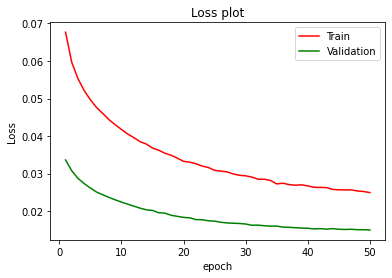

In [ ]:
ls_epoch = [_ + 1 for _ in range(num_epochs)]
plt.plot(ls_epoch, train_loss_arr, color='r', label='Train')
plt.plot(ls_epoch, val_loss_arr, color='g', label='Validation')
plt.title('Loss plot')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()   

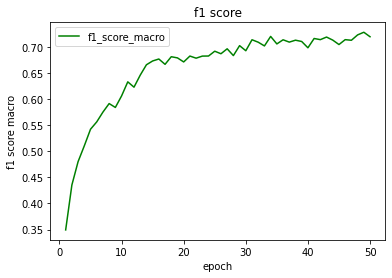

In [ ]:
ls_epoch = [_ + 1 for _ in range(num_epochs)]
plt.plot(ls_epoch, f1_macro_scores, color='g', label='f1_score_macro')
plt.title('f1 score')
plt.ylabel('f1 score macro')
plt.xlabel('epoch')
plt.legend()
plt.show() 

In [ ]:
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)
print(f'Loss: {eval_loss / len(test_loader.dataset)}')

Test Acc: 75.64%: 100%|██████████| 8/8 [00:00<00:00, 217.76it/s]

Loss: 0.0131768198349537


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mx = confusion_matrix(true_labels, predicted_labels)

conf_mx

array([[37,  1,  0,  0,  1,  2,  1,  8,  0,  0],
       [ 0, 66,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0, 32,  4,  1,  0,  2,  0,  0,  4],
       [ 1,  0,  1, 22,  1,  2,  0,  1,  1,  2],
       [ 3,  0,  3,  1, 21,  0,  9,  7,  0,  1],
       [ 1,  0,  3,  2,  0, 29,  0,  1,  0,  6],
       [ 0,  0,  2,  1,  2,  2, 55,  1,  1,  0],
       [ 2,  0,  0,  0,  3,  2,  1, 39,  0,  1],
       [ 0,  0,  1,  1,  0,  2,  3,  1, 26,  2],
       [ 0,  1,  2,  1,  2,  1,  1,  3,  3, 27]])

In [ ]:
print(f"Accurracy: {round(accuracy_score(true_labels, predicted_labels), 3)}\n")

f1_macro = f1_score(true_labels, predicted_labels, average='macro')
print(f"F1-Macro: {round(f1_macro, 3)}\n")

f1_micro = f1_score(true_labels, predicted_labels, average='micro')
print(f"F1-Micro: {round(f1_micro, 3)}\n")


confusion_mat = confusion_matrix(true_labels, predicted_labels, labels=np.arange(10))
confusion_mat_df = pd.DataFrame(confusion_mat).rename(columns=CLASSES_CATEGORIES, index=CLASSES_CATEGORIES)
display(confusion_mat_df)

Accurracy: 0.756

F1-Macro: 0.738

F1-Micro: 0.756



,فرهنگ و هنر,ورزشی,اقتصادی,فناوری و ارتباطات,سیاسی,علمی و پزشکی,بین الملل,مذهبی,حوادث,اجتماعی
فرهنگ و هنر,37,1,0,0,1,2,1,8,0,0
ورزشی,0,66,0,0,1,0,0,0,0,1
اقتصادی,0,0,32,4,1,0,2,0,0,4
فناوری و ارتباطات,1,0,1,22,1,2,0,1,1,2
سیاسی,3,0,3,1,21,0,9,7,0,1
علمی و پزشکی,1,0,3,2,0,29,0,1,0,6
بین الملل,0,0,2,1,2,2,55,1,1,0
مذهبی,2,0,0,0,3,2,1,39,0,1
حوادث,0,0,1,1,0,2,3,1,26,2
اجتماعی,0,1,2,1,2,1,1,3,3,27


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(true_labels, predicted_labels, average='macro')
print("Macro-average precision: {:.2f}".format(precision))
print("Macro-average recall: {:.2f}".format(recall))
precision, recall, f1, support = precision_recall_fscore_support(true_labels, predicted_labels, average='micro')
print("Micro-average precision: {:.2f}".format(precision))
print("Micro-average recall: {:.2f}".format(recall))

Macro-average precision: 0.75
Macro-average recall: 0.74
Micro-average precision: 0.76
Micro-average recall: 0.76


function to predict:

In [ ]:
def predict(x):
  embedding = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
  output = model(torch.from_numpy(embedding).unsqueeze(0))
  predicted_label = output.argmax(-1).item()
  predicted_class_code = CLASSES_CATEGORIES[predicted_label]
  return predicted_class_code

In [ ]:
predict('بایرن مونیخ قهرمان لیگ قهرمانان اروپا شد.')

'ورزشی'

In [ ]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)